In [1]:
import os
import logging
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch

from utils.config import Config

In [2]:
config = Config()

2025-07-13 19:41:56,121 - INFO - Current device: mps


- *Generamos nuestro dataset de prueba utilizando la función `sklearn.datasets.make_circles()`. Agregamos un poco ruído Gaussiano (`noise=0.03`) para que ambas clases se encuentren bien separadas una de la otra, lo que facilita la tarea de clasificación.*

In [3]:
# Number of samples
n = 2000

# Generate data
X, y = make_circles(n_samples=n, noise=0.03, random_state=42)

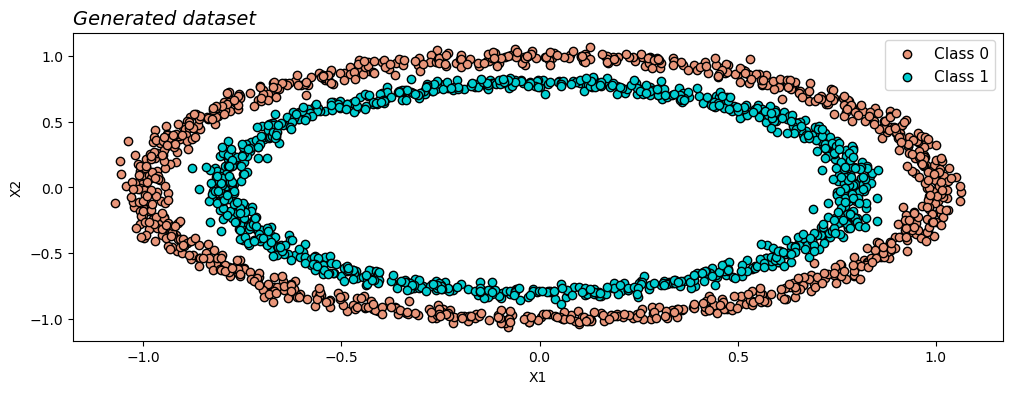

In [4]:
# Plot data
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='darksalmon', edgecolor='black', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='darkturquoise', edgecolor='black', label='Class 1')
ax.set_title('Generated dataset', loc='left', fontdict=dict(size=14, fontstyle='italic'))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(prop={'size': 11})
plt.show()

- *Antes de convertir nuestro datos en tensores, los vamos a separar en una partición de entrenamiento ($70\%$ de los datos). El $30\%$ restante lo vamos a dividir en dos partes: una muestra de validación para usar durante el entrenamiento y otra de evaluación para validar los resultados. Utilizamos la función `sklearn.model_selection.train_test_split()`.*
- *Utilizamos la función `torch.from_numpy()` para convertir los datos en tensores. Nos aseguramos que el tipo de dato sea el adecuado (`torch.float32`) y que esté en el dispositivo correspondiente.*

In [ ]:
# Randomly split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the test set into evaluation and validation partition (e.g., 50% each)
X_eval, X_val, y_eval, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# Convert the data to PyTorch tensors
# We also use the `torch.tensor.to()` method to move the tensors to the available device and set the data type to torch.float32
X_train = torch.from_numpy(X_train).to(dtype=torch.float32, device=config.device)
X_eval = torch.from_numpy(X_eval).to(dtype=torch.float32, device=config.device)
X_val = torch.from_numpy(X_val).to(dtype=torch.float32, device=config.device)
y_train = torch.from_numpy(y_train).to(dtype=torch.float32, device=config.device)
y_eval = torch.from_numpy(y_eval).to(dtype=torch.float32, device=config.device)
y_val = torch.from_numpy(y_val).to(dtype=torch.float32, device=config.device)

- *Concatenamos la partición de entrenamiento (i.e., features + labels) en un mismo tensor, así es más sencillo guardarlo. Hacemos lo mismo con la partición de evaluación. Utilizamos la función `torch.save()`.*

In [19]:
# Concatenate the features and labels along the second dimension (dim=1) to create a tensor of shape (n, 3)
train_data = torch.cat((X_train, y_train.unsqueeze(1)), dim=1)
test_data = torch.cat((X_test, y_test.unsqueeze(1)), dim=1)

# Create a directory to save the data if it doesn't exist
try:
    os.makedirs('temp/data')
    logging.info('Created directory: temp/data')

    # Save the data tensors for later use
    torch.save(train_data, 'temp/data/train_data.pth')
    torch.save(test_data, 'temp/data/test_data.pth')
    logging.info('💾 Data saved successfully in temp/data directory.')
except FileExistsError:
    logging.info('Directory already exists: temp/data')

    # Save the data tensors for later use
    torch.save(train_data, 'temp/data/train_data.pth')
    torch.save(test_data, 'temp/data/test_data.pth')
    logging.info('💾 Data saved successfully in temp/data directory.')

2025-06-19 22:45:07,120 - INFO - Directory already exists: temp/data
2025-06-19 22:45:07,124 - INFO - 💾 Data saved successfully in temp/data directory.
